In [3]:
import numpy as np
import sympy
from sympy import S, Symbol, symbols, solveset, integrate, Integral, diff, intersection, Interval, plot_parametric, plot_implicit, And, E, latex, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

## Занятие 12
## Математический анализ
## Применение интегралов для вычисления объема тела вращения
### Задание 1
Вычислить объем тела вращения около оси ОX фигуры, ограниченной графиком $y = \sin x$, $0 \le x \le \pi$ и осью ОХ. Построить график с помощью plot из sympy, названием графика (title) сделать формулу для вычисления объема по образцу Примера 1, например
$$
\pi\int\limits_0^1 (x - x^2)^2\,dx = \frac{\pi}{30},
$$
только формула должна соответствовать Заданию 1. Использовать latex, mode='inline'.

Eq(pi*Integral(sin(x)**2, (x, 0, pi)), pi**2/2)

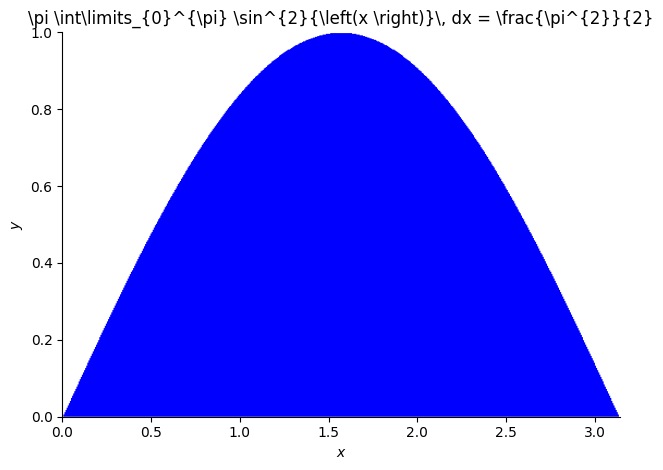

In [58]:
x = symbols('x')
y = symbols('y')
f = Sin(x)

V_OX = Pi * Integral(f**2, (x, 0, Pi))
display(sympy.Eq(V_OX, V_OX.doit()))

p = plot_implicit(y < f, (x, 0, Pi), (y, 0, 1), title=latex(sympy.Eq(V_OX, V_OX.doit())), mode='inline')


### Задание 2.
Вычислить объем тела, получающегося вращением вокруг ОХ астроиды
$$
\left\{
\begin{matrix}
x = \cos^3 t\\
y = \sin^3 t
\end{matrix}
\right.
$$

###### Указание.
Пределы интегрирования $\pi, 0$, поскольку $\cos^3 t$ убывает на $[0, \pi]$.

In [59]:
t = symbols('t')
x = Cos(3*t)
y = Sin(3*t)

V_OX = Pi * Integral(y**2 * x.diff(t), (t, Pi, 0))
display(sympy.Eq(V_OX, V_OX.doit()))

Eq(pi*Integral(-3*sin(3*t)**3, (t, pi, 0)), 4*pi/3)

### Задание 3.
Найти объем тела, которое получается вращением кривой $r = a\cos^2\phi$, $0 \le \phi \le \pi$, вокруг полярной оси.
Построить график при $a = 1$ в полярной системе координат, воспользоваться функцией polar из matplotlib.pyplot.

Eq(2*pi*Integral(a**3*sin(phi)*cos(phi)**6, (phi, 0, pi))/3, 4*pi*a**3/21)

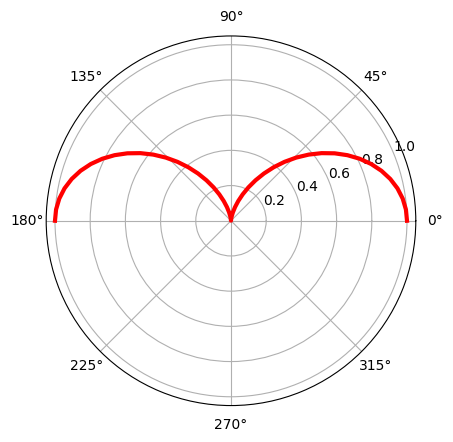

In [65]:
a, phi = symbols('a, phi')
r = a * Cos(phi)**2
V_p = S(2)/3 * Pi * Integral(r**3 * Sin(phi), (phi, 0, Pi))
display(sympy.Eq(V_p, V_p.doit()))


Phi = np.linspace(0, np.pi)
R = 1 * np.cos(Phi)**2
plt.polar(Phi, R, color='red', lw=3)

### Задание 4.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной параболой $y^2 = 2px$, прямой $x=\frac{p}{2}$, $p > 0$ - параметр и осью ОY. Изобразить вращаемую фигуру с помощью plot_implicit.

###### Указание.
Вращаемая фигура симметрична относительно оси OX, поэтому можно вычислить объем фигуры, получающейся вращением верхней ветви параболы, а затем этот объем удвоить.

Eq(2*pi*Integral(x, (y, 0, p)), 2*pi*p*x)

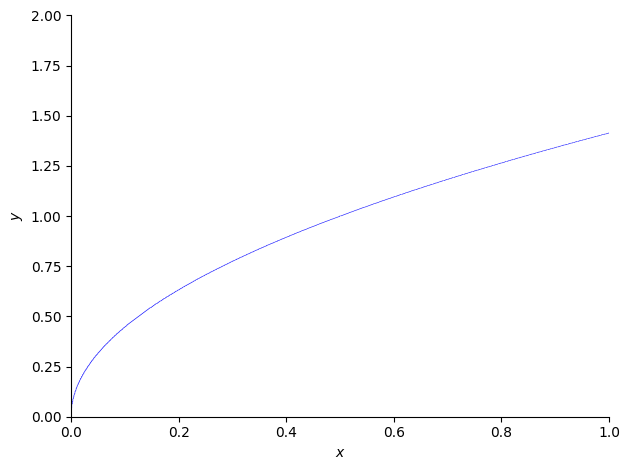

In [87]:
x, y, p = symbols('x y p', positive=True)

parabola_eq = y**2 - 2*p*x
h = sympy.solve(parabola_eq.subs(x, p/2), y)

V_OY = 2 * pi * Integral(x, (y, 0, h))
display(sympy.Eq(V_OY, V_OY.doit()))

plot_implicit(parabola_eq.subs(p, 1), (x, 0, 1), (y, 0, 2))

### Задание 5.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной $y = e^x$, прямой $y=e$, и прямой $y = e^2$.

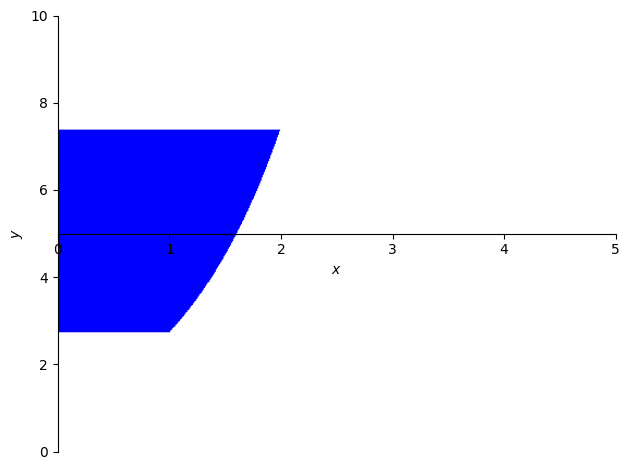

Eq(2*pi*(-Integral(exp(x) - E, (x, 1, 2)) + Integral(-E + exp(2), (x, 0, 2))), 2*pi*exp(2))

In [97]:
x, y = symbols('x y')
plot_implicit(sympy.And(y > E**x, y > E, y < E**2), (x, 0, 5), (y, 0, 10))

V_OY = 2 * Pi * (Integral(E**2 - E, (x, 0, 2)) - Integral(E**x - E, (x, 1, 2)))
display(sympy.Eq(V_OY, V_OY.doit()))

### Индивидуальное задание
Вычислить объем тела, образованного при вращении области между графиками функций
$f_1(x)$ и  $f_2(x)$.

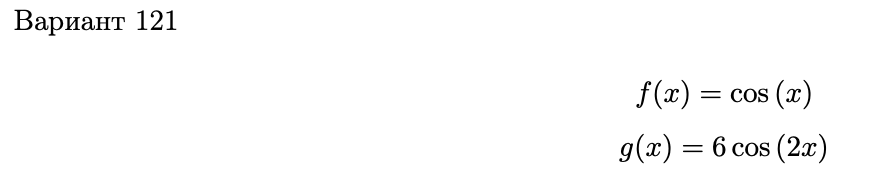

In [99]:
x = Symbol('x')
f = Cos(x)
g = 6 * Cos(2*x)
V_OY = 2 * Pi * Integral(x * (g - f), (x, 0, Pi/4))
display(sympy.Eq(V_OY, V_OY.doit()))

Eq(2*pi*Integral(x*(-cos(x) + 6*cos(2*x)), (x, 0, pi/4)), 2*pi*(-sqrt(2)/2 - sqrt(2)*pi/8 - 1/2 + 3*pi/4))